In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating df from csv file

df = pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
# Understanding data types and looking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [4]:
# Converting Time features to datetime Dtype

df['Data'] = pd.to_datetime(df['Data'])
df['Time'] = pd.to_datetime(df['Time'])

df['Month'] = df['Data'].dt.month.astype(int)
df['Hour'] = df['Time'].dt.hour.astype(int)

In [5]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Hour
0,1475229326,2016-09-29,2025-01-20 23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,23
1,1475229023,2016-09-29,2025-01-20 23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,23
2,1475228726,2016-09-29,2025-01-20 23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,23
3,1475228421,2016-09-29,2025-01-20 23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,23
4,1475228124,2016-09-29,2025-01-20 23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,23


In [6]:
# Droping out unusefull columns

df = df.drop(columns=['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'])
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Hour
0,1.21,48,30.46,59,177.39,5.62,9,23
1,1.21,48,30.46,58,176.78,3.37,9,23
2,1.23,48,30.46,57,158.75,3.37,9,23
3,1.21,48,30.46,60,137.71,3.37,9,23
4,1.17,48,30.46,62,104.95,5.62,9,23


In [7]:
# Analyzing data distribution. 
# Since this a regression case, this data will be usefull to analyze the model performance.

df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Hour
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,11.557425
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,6.912034
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,6.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,12.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,18.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,23.000000


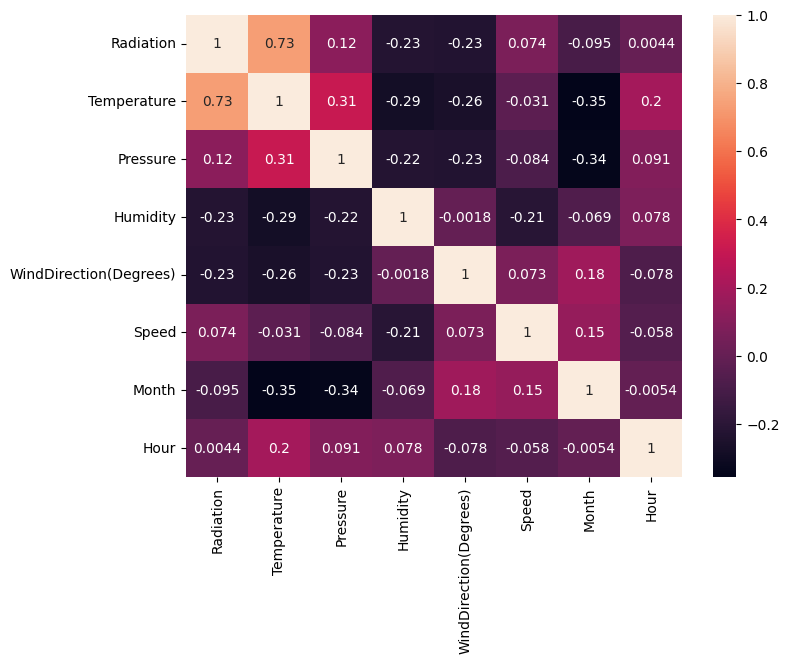

In [8]:
# Creating a correlation matrix and a heatmap vizualization.

corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True)
plt.show()

# Temperature and radiation are highly correlated, as expected.

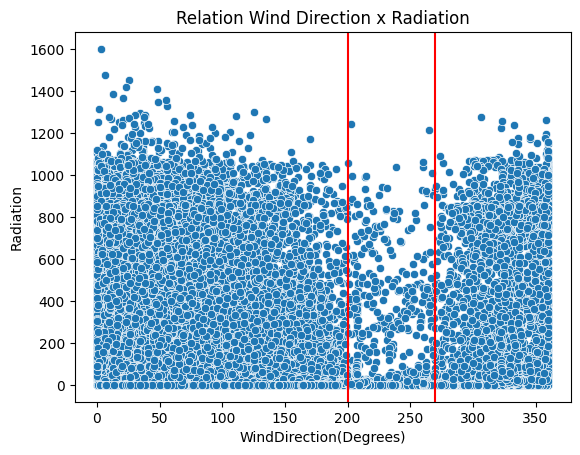

In [9]:
# There seems to be a gap, mostly between 200 and 270 degrees where we have a lack of data.

sns.scatterplot(df, x= 'WindDirection(Degrees)', y='Radiation')
plt.axvline(x=200, color='red', linestyle='-')
plt.axvline(x=270, color='red', linestyle='-')
plt.title('Relation Wind Direction x Radiation')
plt.show()

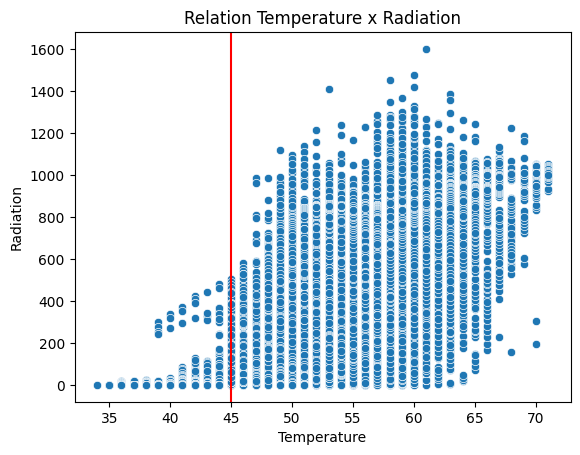

In [10]:
# Vizualizing data distribution for the 0.73 correlation between Temperature and Radiation
# There is a significant rise in Radiation values and records distribution once it reaches the 45 temperature.

sns.scatterplot(df, x= 'Temperature', y='Radiation')
plt.title('Relation Temperature x Radiation')
plt.axvline(x=45, color='red')
plt.show()

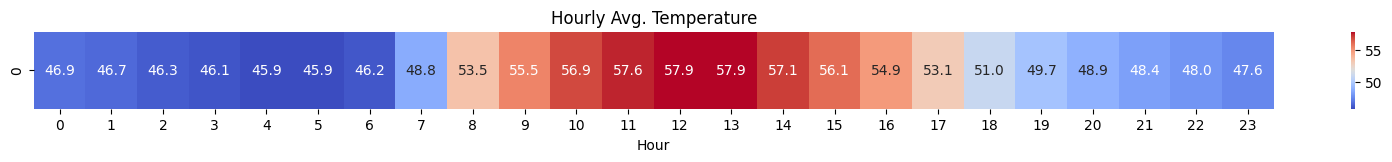

In [11]:
# Since temperature and radiation are correlated, the heatmpa allows to confirm high and low temperature hours.

avg_temperature_hourly = df.groupby('Hour')['Temperature'].mean()
heatmap_data = avg_temperature_hourly.values.reshape(1, -1)

plt.figure(figsize=(20,1))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True,fmt='.1f')
plt.title('Hourly Avg. Temperature')
plt.xlabel('Hour')
plt.show()

In [12]:
# Library import for statistical test where the results will indicate if there is a relevant difference
# between monthly radiation means. By identifying this, it can be determined if 'Month' feature will help
# the ML model to better understand pattern on data.


from scipy import stats

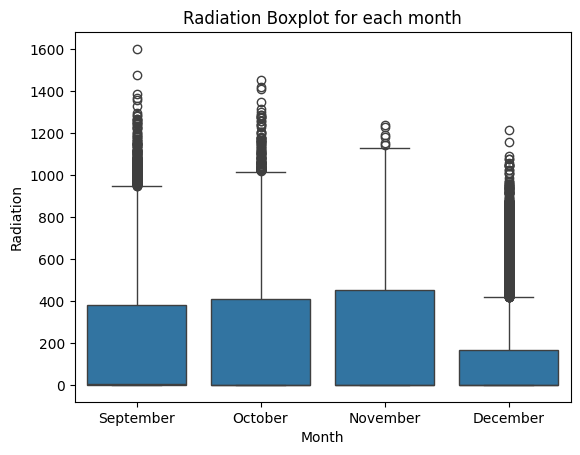

In [13]:
boxplot_data = df.groupby(['Month', 'Radiation']).size()
sns.boxplot(df, x='Month', y='Radiation')
plt.title('Radiation Boxplot for each month')
plt.xticks(ticks=[0,1,2,3], labels=['September', 'October', 'November', 'December'])
plt.show()

In [14]:
# Results indicates that, statistically, there is a considerable difference between means of radiation for each month.

stat, p_value = stats.kruskal(
    df[df['Month'] == 9]['Radiation'],
    df[df['Month'] == 10]['Radiation'],
    df[df['Month'] == 11]['Radiation'],
    df[df['Month'] == 12]['Radiation']
)
print(f'Kruskal test:\nStatistic: {stat}\nP-value: {p_value}')
print('\nConclusion')
if p_value < 0.05:
    print('There is a considerable difference between monthly radiation means.')
else:
    print('There is no considerable difference between monthly radiation means.')


Kruskal test:
Statistic: 715.8714919198229
P-value: 7.593528870452562e-155

Conclusion
There is a considerable difference between monthly radiation means.


In [15]:
# Importing ML library and performanece metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
X = df.drop(['Radiation'], axis=1)
y = df[['Radiation']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 42)

#gb_model = GradientBoostingRegressor(learning_rate=.05,
#                                     n_estimators= 150,
#                                     max_depth= 3,
#                                     random_state= 42)

# Faster learning Rate with extended depth delivered better results

gb_model = GradientBoostingRegressor(learning_rate=.1,
                                     n_estimators= 200,
                                     max_depth= 5,
                                     random_state= 42)

In [39]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [40]:
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

In [41]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Train Results')
print(f'MAE: {mae_train:.3f}')
print(f'MSE: {mse_train:.3f}')
print(f'R2: {r2_train:.3f}')
print()
print('Test Results')
print(f'MAE: {mae_test:.3f}')
print(f'MSE: {mse_test:.3f}')
print(f'R2: {r2_test:.3f}')

Train Results
MAE: 41.903
MSE: 7061.424
R2: 0.929

Test Results
MAE: 48.834
MSE: 10245.770
R2: 0.897


In [21]:
importance = sorted(zip(X.columns, (gb_model.feature_importances_ * 100)), key=lambda x: x[1], reverse=True)
print('Feature Importance\n')
for k, v in importance:
    print(f'{k:<23} {v:>5.2f} %')

Feature Importance

Temperature             61.19 %
Hour                    30.53 %
Humidity                 4.19 %
WindDirection(Degrees)   1.70 %
Pressure                 1.11 %
Month                    0.97 %
Speed                    0.32 %
